# Introduction

In this project data on life expectancy and Gross Domestic Product (GDP) of six countries from the World Health Organization and the World Bank will be analyzed. The relationship between GDP and life expectancy will be identified.

The goal of this project is to analize data of different countries and identify the relationship between GDP and life expectancy.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

 - How did life expectancy develop over time in the six nations?
 - How did the GDP develop over time in the six nations?
 - Is there a correlation between GDP and life expectancy of a country?
 - What is the average life expectancy and GDP in these nations?
 
**Data sources:**

The data in `all_data.csv` was provided by [Codecademy.com](https://www.codecademy.com).

# Scoping

Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, which is already provided. Thirdly, the analysis includes the methods and questions that are aligned with the project goals. Lastly, evaluation will build conclusions and findings from the analysis.


## Project Goals

In this project

 - How did life expectancy develop over time in the six nations?
 - How did the GDP develop over time in the six nations?
 - Is there a correlation between GDP and life expectancy of a country?
 - What is the average life expectancy and GDP in these nations?
 
## Data

This project has one dataset in the file `all_data.csv` which has information about the life expectancy and GDP of six countries across 15 years. The data stems from the World Health Organization and World Bank. This data will be prepared and used to analyze the goals of the project.

## Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if there is a correlation between GDP and life expectancy. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 


## Evaluation

This section revisits the goals and checks if the output of the analysis corresponds to the questions first set to be answered. This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This also includes limitations or if any of the analysis could have been done using different methodologies.


# Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# read in data
df = pd.read_csv('all_data.csv')
df.rename(columns = {'Life expectancy at birth (years)':'Life expectancy'}, 
          inplace = True)
df.head()

,Country,Year,Life expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df = df.replace('United States of America', 'USA')

In [4]:
# convert unit of GDP
df.GDP /= 10**8

## Development of Life Expectancy

In [5]:
# preparing the data to plot
country_names = list(df['Country'].unique())

life_exps = []
gdps = []
for name in country_names:
    life_exps.append(df[df.Country==name]['Life expectancy'])
    gdps.append(df[df.Country==name]['GDP'])
    
years = df[df.Country=='Chile'].Year    

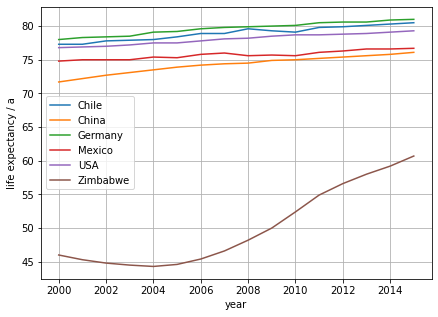

In [6]:
# plot life expectancy
plt.figure(figsize=(7,5))
for le, name in zip(life_exps, country_names):
    plt.plot(years, le, label=name)
plt.grid(True)
plt.xlabel('year')
plt.ylabel('life expectancy / a')
plt.legend();    

Tendentially, life expectancy in all countries rises over the years. Zimbabwe has the highest increase of life expectancy. In Zimbabwe life expectancy increased from 46 years to 62 years (increase of 16 years) within 15 years.

## Development of GDP

In [7]:
# plot GDP
plt.figure(figsize=(7,5))
for country in gdp_country_zip:
    plt.plot(years, country[0], label=country[1])
plt.grid(True)
plt.yscale('log')
plt.xlabel('year')
plt.ylabel('GDP / billion $')
plt.legend(); 

NameError: name 'gdp_country_zip' is not defined

<Figure size 504x360 with 0 Axes>

In all countries the GDP increased over the years. China had the highest increase of GDP with 9.9 billion $ within 15 years.

## Correlation GDP and Life Expectancy

In [ ]:
# scatter plots of correlations
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plt.tight_layout()

s1 = ax[0,0].scatter(df[df.Country=='Chile']['GDP'], 
                     df[df.Country=='Chile']['Life expectancy'])
s2 = ax[0,1].scatter(df[df.Country=='China']['GDP'], 
                     df[df.Country=='China']['Life expectancy'], color='orange')
s3 = ax[0,2].scatter(df[df.Country=='Germany']['GDP'], 
                     df[df.Country=='Germany']['Life expectancy'], color='green')
s4 = ax[1,0].scatter(df[df.Country=='Mexico']['GDP'], 
                     df[df.Country=='Mexico']['Life expectancy'], color='red')
s5 = ax[1,1].scatter(df[df.Country=='USA']['GDP'], 
                     df[df.Country=='USA']['Life expectancy'], color='violet')
s6 = ax[1,2].scatter(df[df.Country=='Zimbabwe']['GDP'], 
                     df[df.Country=='Zimbabwe']['Life expectancy'], color='brown')
plt.setp(ax[:], xlabel='GDP / billion $')
plt.setp(ax[:], ylabel='life expectancy / a')
fig.legend(handles=[s1, s2, s3, s4, s5, s6], 
           labels=country_names, loc="center right", 
           title='Country')
plt.subplots_adjust(right=0.87, wspace=0.25, hspace=0.2);

In [ ]:
# calculate and print the Pearson coefficient
from scipy.stats import pearsonr

corrs = []
for (le, gdp) in zip(life_exps, gdps):
    corrs.append(pearsonr(le, gdp)[0])
    
for (corr, name) in zip(corrs, country_names):
    print('Pearson correlation {}: {}'.format(name, corr))    

Most graphs show a positive linear correlation between life expectancy and GDP. Life expectancy increases with rising GDP. USA has the highest correlation with a Pearson correlation coefficient of 0.982. The graph for China shows a positiv but nonlinear correlation and has the lowest Pearson correlation of 0.909. Other factors than just the ecomomic strength must play a role here. Although, there is a correlation between life expectancy and GDP, it does not mean, that there is a causal relation between the them.

## Average Life Expectancy and average GDP

In [ ]:
# plot average life expectancy
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Country', y='Life expectancy', zorder=2)
plt.grid(True, axis='y', zorder=1)

The graph above shows the average life expectancy in the six countries over 15 years. Chile, Germany and USA have a similar average life expectancy of 78.9, 79.7 and 78.1 years, respectively. In China and Mexico the life expectancy is 74.3 and 75.7 years, respectively. Zimbabwe has the lowest life expectancy of 50.1 years.

In [ ]:
df.groupby('Country')['Life expectancy'].mean().reset_index()

In [ ]:
# plot average GDP
plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='Country', y='GDP', zorder=2)
plt.grid(True, axis='y', zorder=1)

The graph shows the average GDP in the six coutries over 15 years. USA has by far the highest GDP of 140,750 billion Dollar, followed by China, Germany, Mexico and Chile with a GDP of 49,577, 30,947, 9,767 and 1,698 billion Dollar, respectively. Zimbabwe has the smallest GDP of 91 billion Dollar.

In [ ]:
df.groupby('Country').GDP.mean().reset_index()

# Conclusion

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- How did life expectancy develop over time in the six nations?
    - In all countries life expectancy increased within the examined time span. In Zimbabwe life expectancy increased the most.
- How did the GDP develop over time in the six nations?
    - In all Nation the GDP increased. The highest rise was in China.
- Is there a correlation between GDP and life expectancy of a country?
    - There is a positive linear correlation between GDP and life expectancy for all countries.
- What is the average life expectancy and GDP in these nations?
    - Germany has the highest average life expectancy of 79.7 years. Zimbabwe has the lowest life expectancy of 50.1 years.
    - USA has by far the highest GDP of around 141000 billion Dollar. Zimbabwe has the smallest GDP of 91 billion Dollar.